<a href="https://colab.research.google.com/github/duaneywadey/A-collection-of-Jupyter-notebooks-and-CSV-files/blob/data-analysis/PLOTTING_GUIDE_PH_Houses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [157]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [158]:
df = pd.read_csv('https://raw.githubusercontent.com/duaneywadey/A-collection-of-Jupyter-notebooks-and-CSV-files/main/CSV%20Files/new_home_prices_ph.csv')
df.head()

,HouseDescription,Address,Cost
0,\n ...,\n \n ...,"\n ₱ 4,..."
1,\n ...,\n \n ...,"\n ₱ 5,..."
2,\n ...,\n \n ...,"\n ₱ 4,..."
3,\n ...,\n \n ...,"\n ₱ 3,..."
4,\n ...,\n \n ...,\n ₱ 72...


In [159]:
df['HouseDescription'] = df['HouseDescription'].str.replace('\n', '') 
df['Address'] = df['Address'].str.replace('\n', '') 
df['Cost'] = df['Cost'].str.replace('\n', '') 
df['HouseDescription'] = df['HouseDescription'].str.replace(' ', '') 
df['Address'] = df['Address'].str.replace(' ', '') 
df['Cost'] = df['Cost'].str.replace(' ', '') 
df['Cost'] = df['Cost'].str.replace('₱', '')
df['Cost'] = df['Cost'].str.replace(',', '')
df['Cost'] = df['Cost'].astype('int32')  

df.head()

,HouseDescription,Address,Cost
0,"AsensoVillage,FilinvestLandInc","Bubuyan,Calamba",4100000
1,4-BedroomSingleDetachedHouseandLotforSaleinAjo...,"ValleCruz,Cabanatuan",5700000
2,"2-StoreyTownhouseforSaleinFilinvestNorthview,QC","BatasanHills,QuezonCity",4800000
3,AffordableHouseandlotcompletelyfinishedQuezonc...,"SanBartolome,QuezonCity",3050000
4,Luxury5BedroomsHouseandLotatSanJuanCity,"PedroCruz,SanJuan",72000000


In [160]:
df.shape

(2882, 3)

In [161]:
df['Address'] = df['Address'].str.replace(',', ', ') 
df.head()

,HouseDescription,Address,Cost
0,"AsensoVillage,FilinvestLandInc","Bubuyan, Calamba",4100000
1,4-BedroomSingleDetachedHouseandLotforSaleinAjo...,"ValleCruz, Cabanatuan",5700000
2,"2-StoreyTownhouseforSaleinFilinvestNorthview,QC","BatasanHills, QuezonCity",4800000
3,AffordableHouseandlotcompletelyfinishedQuezonc...,"SanBartolome, QuezonCity",3050000
4,Luxury5BedroomsHouseandLotatSanJuanCity,"PedroCruz, SanJuan",72000000


In [162]:
df['City/Province'] = df['Address'].str.split().str[-1]  
df.head()

,HouseDescription,Address,Cost,City/Province
0,"AsensoVillage,FilinvestLandInc","Bubuyan, Calamba",4100000,Calamba
1,4-BedroomSingleDetachedHouseandLotforSaleinAjo...,"ValleCruz, Cabanatuan",5700000,Cabanatuan
2,"2-StoreyTownhouseforSaleinFilinvestNorthview,QC","BatasanHills, QuezonCity",4800000,QuezonCity
3,AffordableHouseandlotcompletelyfinishedQuezonc...,"SanBartolome, QuezonCity",3050000,QuezonCity
4,Luxury5BedroomsHouseandLotatSanJuanCity,"PedroCruz, SanJuan",72000000,SanJuan


In [163]:
df['City/Province'].value_counts()

QuezonCity    1173
Parañaque      132
Marikina       120
LasPiñas       119
Antipolo       117
              ... 
Balamban         1
Oton             1
Pateros          1
SanPedro         1
Malvar           1
Name: City/Province, Length: 120, dtype: int64

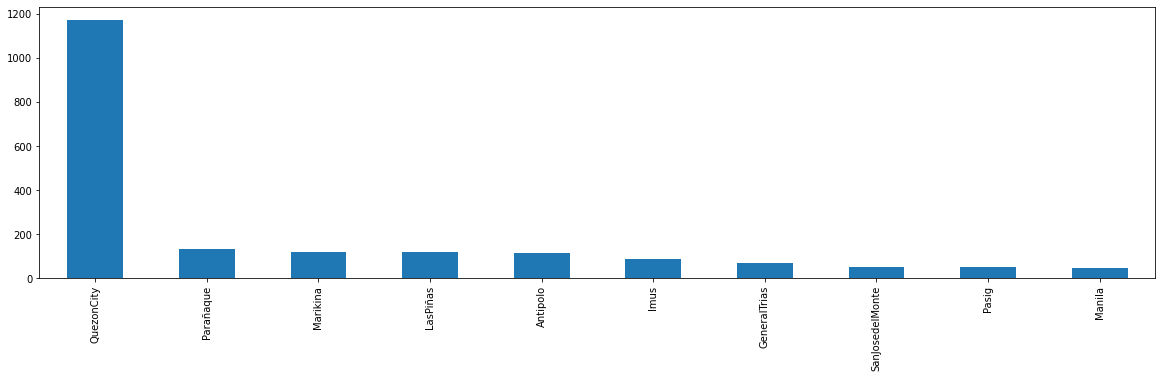

In [164]:
# GET UNIQUE VALUES AND DISPLAY TOP 5 MOST OCCURING

plt.figure(figsize=(20,5))
df['City/Province'].value_counts()[:10].sort_values(ascending=False).plot.bar()

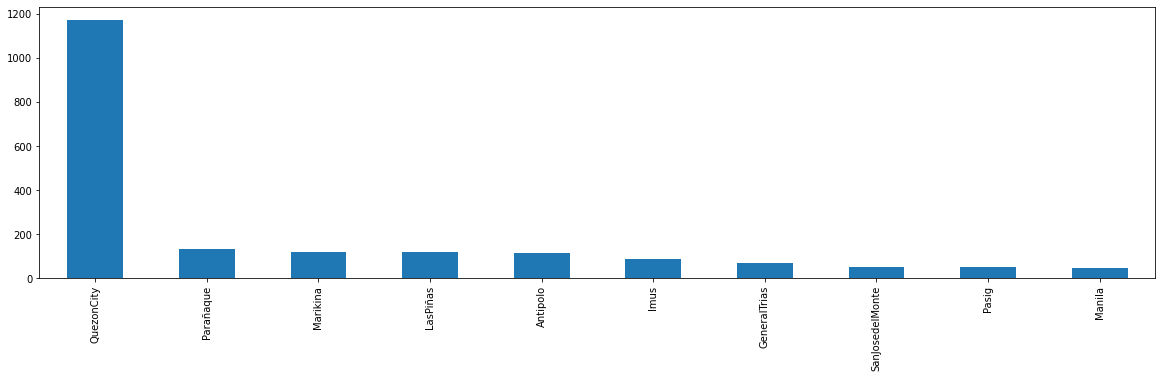

In [165]:
plt.figure(figsize=(20,5))
df['City/Province'].value_counts()[:10].sort_values(ascending=False).plot.bar()


In [166]:
df['Cost'].nlargest(5)

811     1277500000
200     1215752192
2022     735480000
2795     558000000
1750     400000000
Name: Cost, dtype: int32

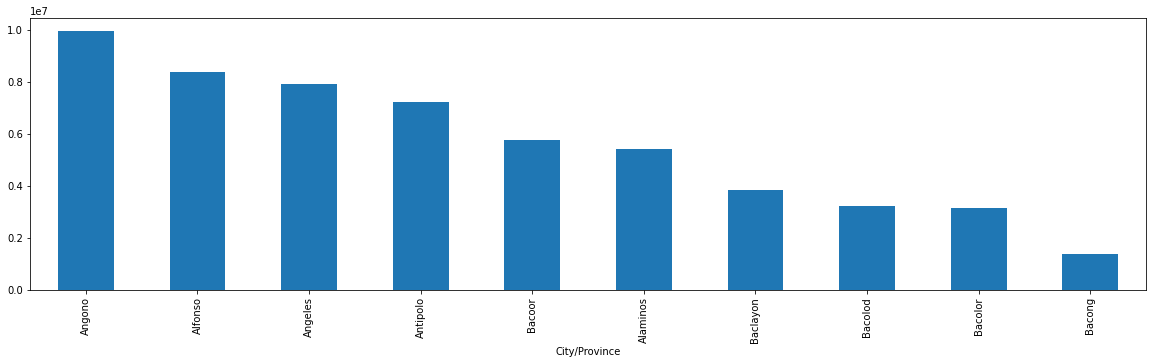

In [167]:
plt.figure(figsize=(20,5))
df.groupby('City/Province')['Cost'].mean()[:10].sort_values(ascending=False).plot.bar()

In [168]:
## Z Score defines how many standard deviation away a datapoint is from the mean. 

df['zscore'] = (df.Cost-df.Cost.mean())/df.Cost.std() # Adding a zcore column to our dataframe
df.sample(5)

,HouseDescription,Address,Cost,City/Province,zscore
2456,KelseyHillsHouseandLot,SanJosedelMonte,965000,SanJosedelMonte,-0.276529
2866,HouseandLotforsaleinTandangSoraverynearMindana...,QuezonCity,11200000,QuezonCity,-0.034361
2034,House&LotnearMetroManila,Imus,1600000,Imus,-0.261504
392,Brandnewsingleatt3bdhousemoveinwhileDP,Imus,2009280,Imus,-0.251820
295,ElegantandAffordableHouseandLotForSaleinCalamb...,Calamba,6650298,Calamba,-0.142010


In [169]:
df.loc[df['City/Province'] == 'Tipo-Tipo']

,HouseDescription,Address,Cost,City/Province,zscore
200,PixelHouseandLotforsale,"Bohebaca, Tipo-Tipo",1215752192,Tipo-Tipo,28.466259


In [170]:
df = df[df['Cost'] < 1215752192	]
df.loc[df['City/Province'] == 'Tipo-Tipo']

,HouseDescription,Address,Cost,City/Province,zscore


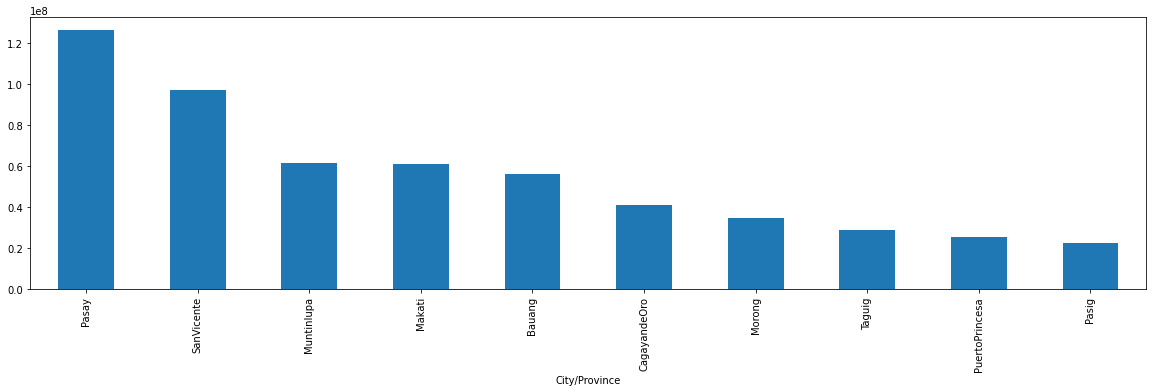

In [171]:
# Top 10 expensive houses and their locations

plt.figure(figsize=(20,5))
df.groupby('City/Province')['Cost'].mean().nlargest(10).plot.bar()

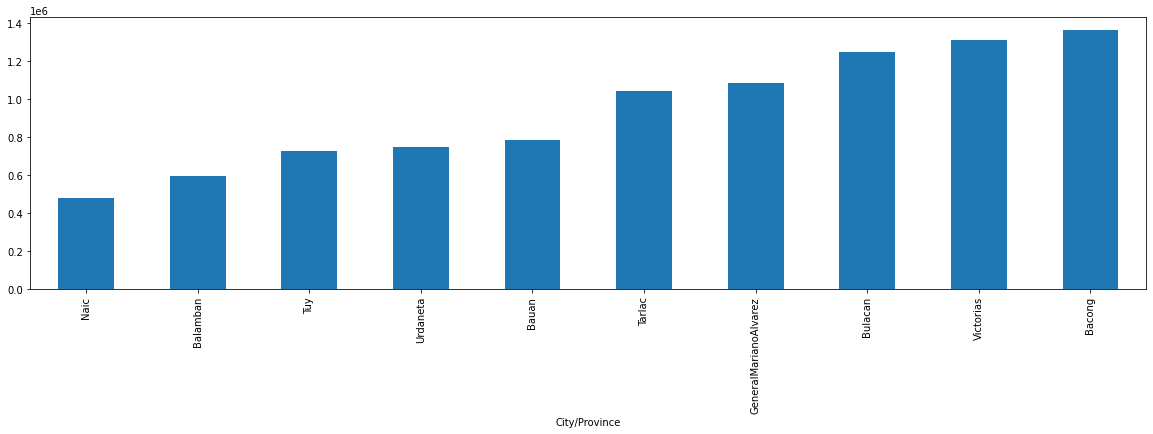

In [172]:
# Top 10 cheapest houses and their locations

plt.figure(figsize=(20,5))
df.groupby('City/Province')['Cost'].mean().nsmallest(10).plot.bar()